## Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from PIL import Image
import requests

In [3]:
from flask_app.commons import util

In [4]:
%load_ext autoreload
%autoreload 2

## Sample Images

In [5]:
source = Image.open('../assets/representative/celeba_hq/src/female/039913.jpg')
ref = Image.open('../assets/representative/celeba_hq/ref/female/015248.jpg')

In [6]:
# resize to 256x256
source = source.resize((256,256))
ref = ref.resize((256,256))

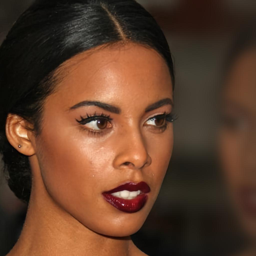

In [7]:
source

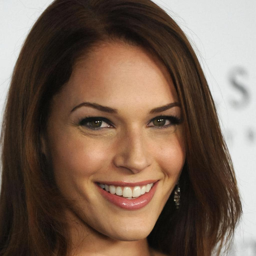

In [8]:
ref

## Calling Flask app

In [9]:
URL = "http://10.2.117.32:5000/predict"

In [10]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'female'
}

In [11]:
response = requests.post(URL, json=payload)

In [12]:
response_json = response.json()

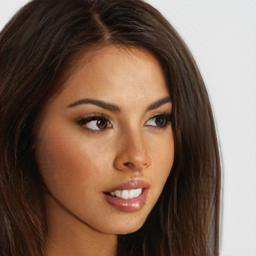

In [13]:
util.base64_to_image(response_json['output_img'])

## Another Example

In [14]:
source = Image.open('../assets/representative/celeba_hq/src/male/005735.jpg').resize((256,256))
ref = Image.open('../assets/representative/celeba_hq/ref/male/012712.jpg').resize((256,256))

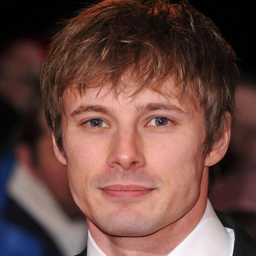

In [15]:
source

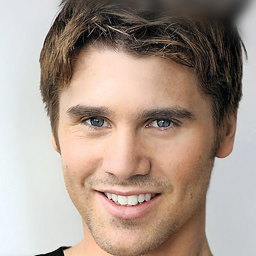

In [16]:
ref

In [17]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'male'
}

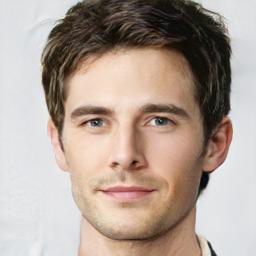

In [18]:
response = requests.post(URL, json=payload)
response_json = response.json()
util.base64_to_image(response_json['output_img'])

## Another Example (w/o) resizing

In [19]:
source = Image.open('../assets/representative/celeba_hq/src/female/051340.jpg')
ref = Image.open('../assets/representative/celeba_hq/ref/male/012712.jpg')

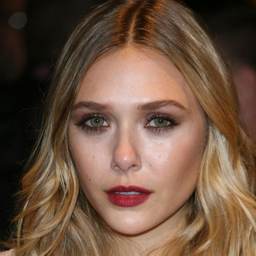

In [20]:
source.resize((256,256))

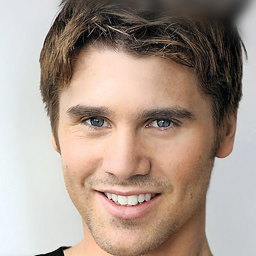

In [21]:
ref.resize((256,256))

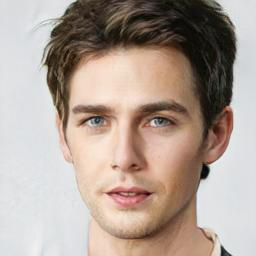

In [22]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'male'
}
response = requests.post(URL, json=payload)
response_json = response.json()
util.base64_to_image(response_json['output_img'])